# Sentiment Analysis

## Introduction

So far, all of the analysis we've done has been pretty generic - looking at counts, creating scatter plots, etc. These techniques could be applied to numeric data as well.

When it comes to text data, there are a few popular techniques that we'll be going through in the next few notebooks, starting with sentiment analysis. A few key points to remember with sentiment analysis.

1. **TextBlob Module:** Linguistic researchers have labeled the sentiment of words based on their domain expertise. Sentiment of words can vary based on where it is in a sentence. The TextBlob module allows us to take advantage of these labels.
2. **Sentiment Labels:** Each word in a corpus is labeled in terms of polarity and subjectivity (there are more labels as well, but we're going to ignore them for now). A corpus' sentiment is the average of these.
   * **Polarity**: How positive or negative a word is. -1 is very negative. +1 is very positive.
   * **Subjectivity**: How subjective, or opinionated a word is. 0 is fact. +1 is very much an opinion.

For more info on how TextBlob coded up its [sentiment function](https://planspace.org/20150607-textblob_sentiment/).

Let's take a look at the sentiment of the various transcripts, both overall and throughout the comedy routine.

## Sentiment of Routine

In [1]:
# We'll start by reading in the corpus, which preserves word order
# import pickle
# file = open("corpus.pkl", "rb")
# data = pickle.load(file)
# print(type(data))
# data
import pandas as pd
data = pd.read_csv('data.csv')
data.head()
# df = df.drop(['publish_date'], axis=1)
data = data.rename(columns = {'headline_text': 'text'})
data['text'] = data['text'].astype(str)
data = data.loc[:9999]
data.head()
data.to_csv('output.csv', index=False)

In [2]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['text'].apply(pol)
data['subjectivity'] = data['text'].apply(sub)
data

,publish_date,text,polarity,subjectivity
0,20030219,aba decides against community broadcasting lic...,0.00,0.00
1,20030219,act fire witnesses must be aware of defamation,0.25,0.25
2,20030219,a g calls for infrastructure protection summit,0.00,0.00
3,20030219,air nz staff in aust strike for pay rise,0.00,0.00
4,20030219,air nz strike to affect australian travellers,0.00,0.00
...,...,...,...,...
9995,20030407,vic govt plan aims to reduce water use,0.00,0.00
9996,20030407,vic govt urged to green light marina plan,0.10,0.50
9997,20030407,vic nats leave door open on coalition,0.00,0.50
9998,20030407,waterfall survivors tell of train speeding before,0.00,0.00


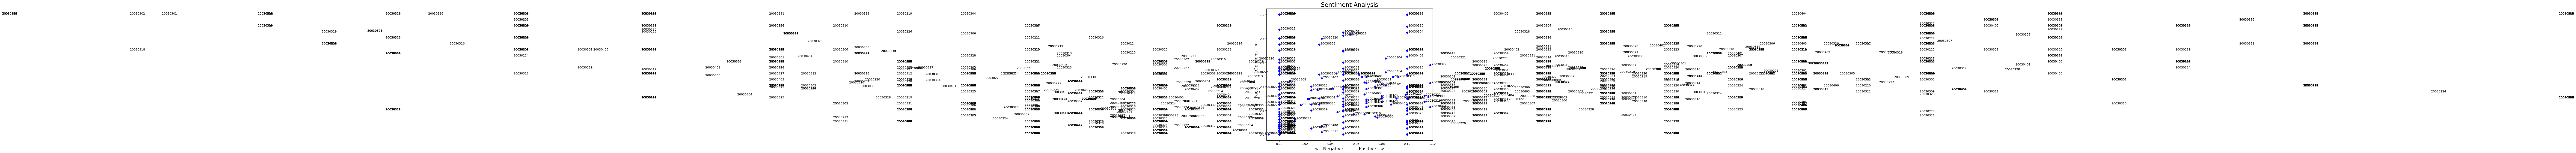

In [3]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [10, 8]

for index, comedian in enumerate(data.index):
    x = data.polarity.loc[comedian]
    y = data.subjectivity.loc[comedian]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['publish_date'][index], fontsize=10)
    plt.xlim(-.01, .12) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

## Sentiment of Routine Over Time

Instead of looking at the overall sentiment, let's see if there's anything interesting about the sentiment over time throughout each routine.

In [3]:
# We'll start by reading in the corpus, which preserves word order
import pandas as pd

data = pd.read_pickle('corpus2.pkl')
data

,transcript,name
file1,what a wooden structure says about our ancien...,file1
file10,how fiefdoms and do or die imperil the success...,file10
file11,years later and still no clarity on green cle...,file11
file12,a newfound neutron star might light the way fo...,file12
file13,uttering the uterus mapping myths and menstrua...,file13
file14,the unintended consequences of vaccine policy...,file14
file15,not a matter of concern but a matter of cauti...,file15
file16,interview the threat of selfcensorship in scie...,file16
file17,the sahara desert used to be a green savannah ...,file17
file18,hydrogen makes itself at homehong kongit has b...,file18


In [4]:
# Create quick lambda functions to find the polarity and subjectivity of each routine
# Terminal / Anaconda Navigator: conda install -c conda-forge textblob
from textblob import TextBlob

pol = lambda x: TextBlob(x).sentiment.polarity
sub = lambda x: TextBlob(x).sentiment.subjectivity

data['polarity'] = data['transcript'].apply(pol)
data['subjectivity'] = data['transcript'].apply(sub)
data

,transcript,name,polarity,subjectivity
file1,what a wooden structure says about our ancien...,file1,0.125694,0.440126
file10,how fiefdoms and do or die imperil the success...,file10,0.128459,0.356592
file11,years later and still no clarity on green cle...,file11,0.135137,0.406066
file12,a newfound neutron star might light the way fo...,file12,0.033436,0.433649
file13,uttering the uterus mapping myths and menstrua...,file13,0.091040,0.434170
file14,the unintended consequences of vaccine policy...,file14,0.084452,0.413759
file15,not a matter of concern but a matter of cauti...,file15,0.132203,0.472934
file16,interview the threat of selfcensorship in scie...,file16,0.047005,0.362826
file17,the sahara desert used to be a green savannah ...,file17,-0.002441,0.410171
file18,hydrogen makes itself at homehong kongit has b...,file18,0.131746,0.436591


C:\Users\HP\AppData\Local\Temp\ipykernel_55472\3246801580.py:10: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(x+.001, y+.001, data['name'][index], fontsize=10)


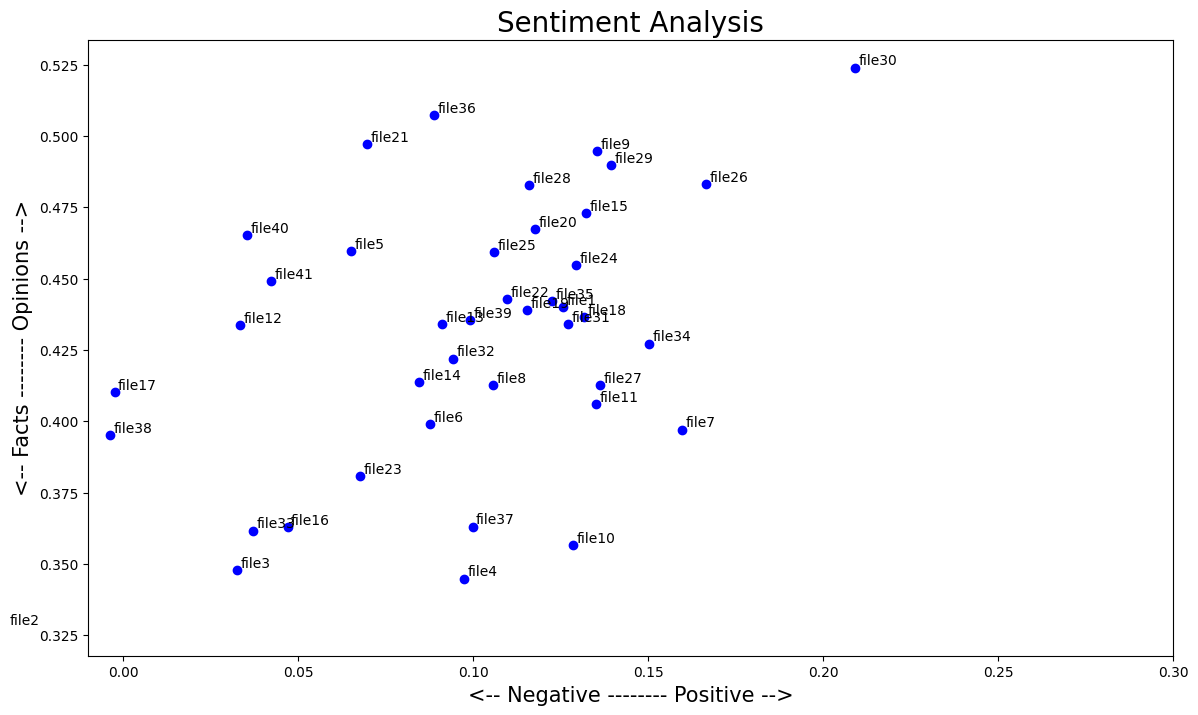

In [14]:
# Let's plot the results
import matplotlib.pyplot as plt

plt.rcParams['figure.figsize'] = [14, 8]

for index, file in enumerate(data.index):
    x = data.polarity.loc[file]
    y = data.subjectivity.loc[file]
    plt.scatter(x, y, color='blue')
    plt.text(x+.001, y+.001, data['name'][index], fontsize=10)
    plt.xlim(-.01, .30) 
    
plt.title('Sentiment Analysis', fontsize=20)
plt.xlabel('<-- Negative -------- Positive -->', fontsize=15)
plt.ylabel('<-- Facts -------- Opinions -->', fontsize=15)

plt.show()

In [6]:
# Split each routine into 10 parts
import numpy as np
import math

def split_text(text, n=10):
    '''Takes in a string of text and splits into n equal parts, with a default of 10 equal parts.'''

    # Calculate length of text, the size of each chunk of text and the starting points of each chunk of text
    length = len(text)
    size = math.floor(length / n)
    start = np.arange(0, length, size)
    
    # Pull out equally sized pieces of text and put it into a list
    split_list = []
    for piece in range(n):
        split_list.append(text[start[piece]:start[piece]+size])
    return split_list

In [7]:
# Let's take a look at our data again
data

,transcript,name,polarity,subjectivity
file1,what a wooden structure says about our ancien...,file1,0.125694,0.440126
file10,how fiefdoms and do or die imperil the success...,file10,0.128459,0.356592
file11,years later and still no clarity on green cle...,file11,0.135137,0.406066
file12,a newfound neutron star might light the way fo...,file12,0.033436,0.433649
file13,uttering the uterus mapping myths and menstrua...,file13,0.091040,0.434170
file14,the unintended consequences of vaccine policy...,file14,0.084452,0.413759
file15,not a matter of concern but a matter of cauti...,file15,0.132203,0.472934
file16,interview the threat of selfcensorship in scie...,file16,0.047005,0.362826
file17,the sahara desert used to be a green savannah ...,file17,-0.002441,0.410171
file18,hydrogen makes itself at homehong kongit has b...,file18,0.131746,0.436591


In [9]:
# Let's create a list to hold all of the pieces of text
list_pieces = []
for t in data.transcript:
    split = split_text(t,20)
    list_pieces.append(split)
    
list_pieces

[['what a  wooden structure says about our ancient\xa0relativesthe anusandhan national research foundation nrf bill wasrecently approvedin parliament it aims to revolutionise the research and development rd ecosystem in india by bringing in significant a',
  'dditional investment from the government private sector and international collaborationsthe nrf has a vision to promote longterm innovative research acrossbasic sciences humanities and social sciencesin a bid to position india as a global superpowe',
  'rhowever for that to happen the existing issues in the research ecosystem need to be addressedone significant issue is acquiring retaining and nurturing topquality research talent of particular importance are doctoral students who are arguably the ',
  'most affected by problems in the existing setupit is no surprise that doctoral students are not paid well their salaries are often not disbursed on time and they are not offered enough opportunities to promote their research at inte

In [10]:
# The list has 10 elements, one for each transcript
len(list_pieces)

41

In [11]:
# Each transcript has been split into 10 pieces of text
len(list_pieces[0])

20

In [12]:
# Calculate the polarity for each piece of text

polarity_transcript = []
for lp in list_pieces:
    polarity_piece = []
    for p in lp:
        polarity_piece.append(TextBlob(p).sentiment.polarity)
    polarity_transcript.append(polarity_piece)
    
polarity_transcript

[[0.1875,
  0.10666666666666666,
  0.2708333333333333,
  0.16666666666666666,
  0.0,
  0.24375000000000002,
  0.13636363636363635,
  -0.4,
  0.0125,
  0.046666666666666676,
  0.012500000000000006,
  0.17261904761904762,
  0.19374999999999998,
  0.14166666666666666,
  0.5,
  -0.25,
  0.12,
  0.7,
  0.16666666666666666,
  0.14375],
 [0.3,
  -0.09999999999999999,
  0.4,
  0.14464285714285713,
  0.1266233766233766,
  -0.012499999999999997,
  0.13333333333333333,
  0.0625,
  0.04,
  0.17857142857142858,
  0.19999999999999998,
  0.375,
  0.22000000000000003,
  0.13636363636363635,
  0.1,
  0.1438775510204082,
  0.3,
  0.27999999999999997,
  0.04545454545454545,
  0.02471590909090909],
 [-0.04666666666666667,
  0.23199999999999998,
  0.04833333333333333,
  -0.026666666666666665,
  0.08083333333333333,
  0.12222222222222223,
  0.09166666666666666,
  0.17916666666666667,
  0.048444444444444436,
  0.29791666666666666,
  -0.23333333333333334,
  0.16666666666666669,
  0.15625,
  0.3375,
  0.121428

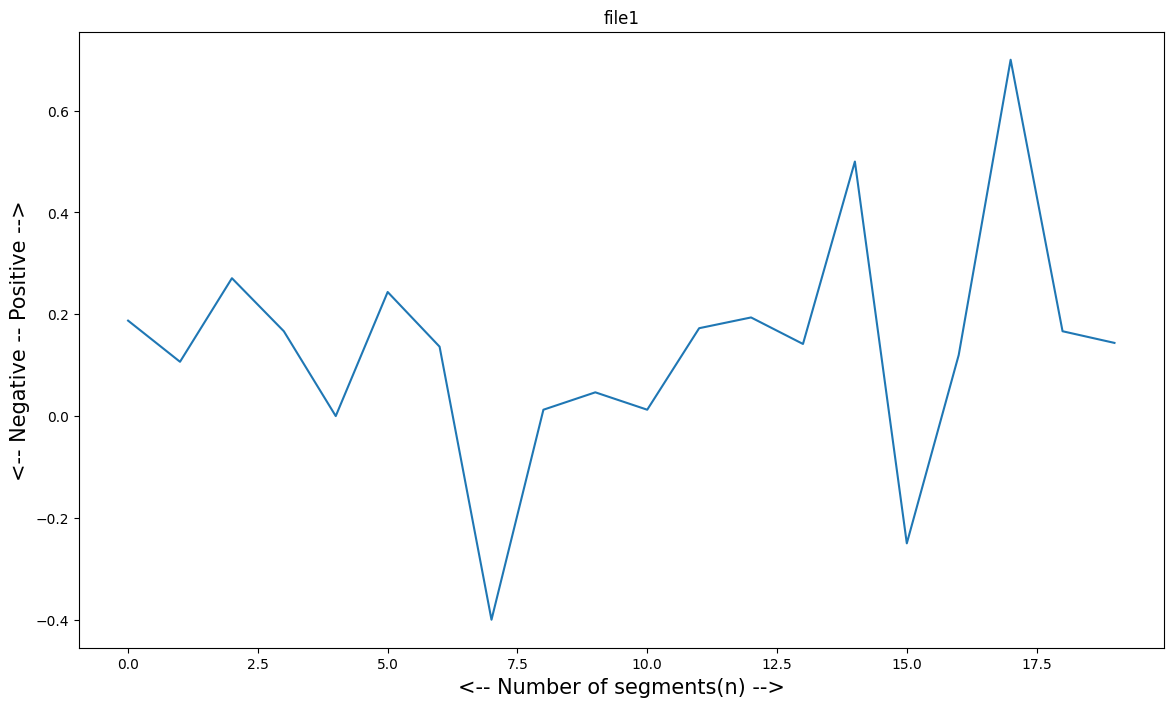

In [15]:
# Show the plot for one file
plt.plot(polarity_transcript[0])
plt.title(data['name'].index[0])
plt.xlabel('<-- Number of segments(n) -->', fontsize=15)
plt.ylabel('<-- Negative -- Positive -->', fontsize=15)
plt.show()

C:\Users\HP\AppData\Local\Temp\ipykernel_55472\3009499734.py:8: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.title(data['name'][index])


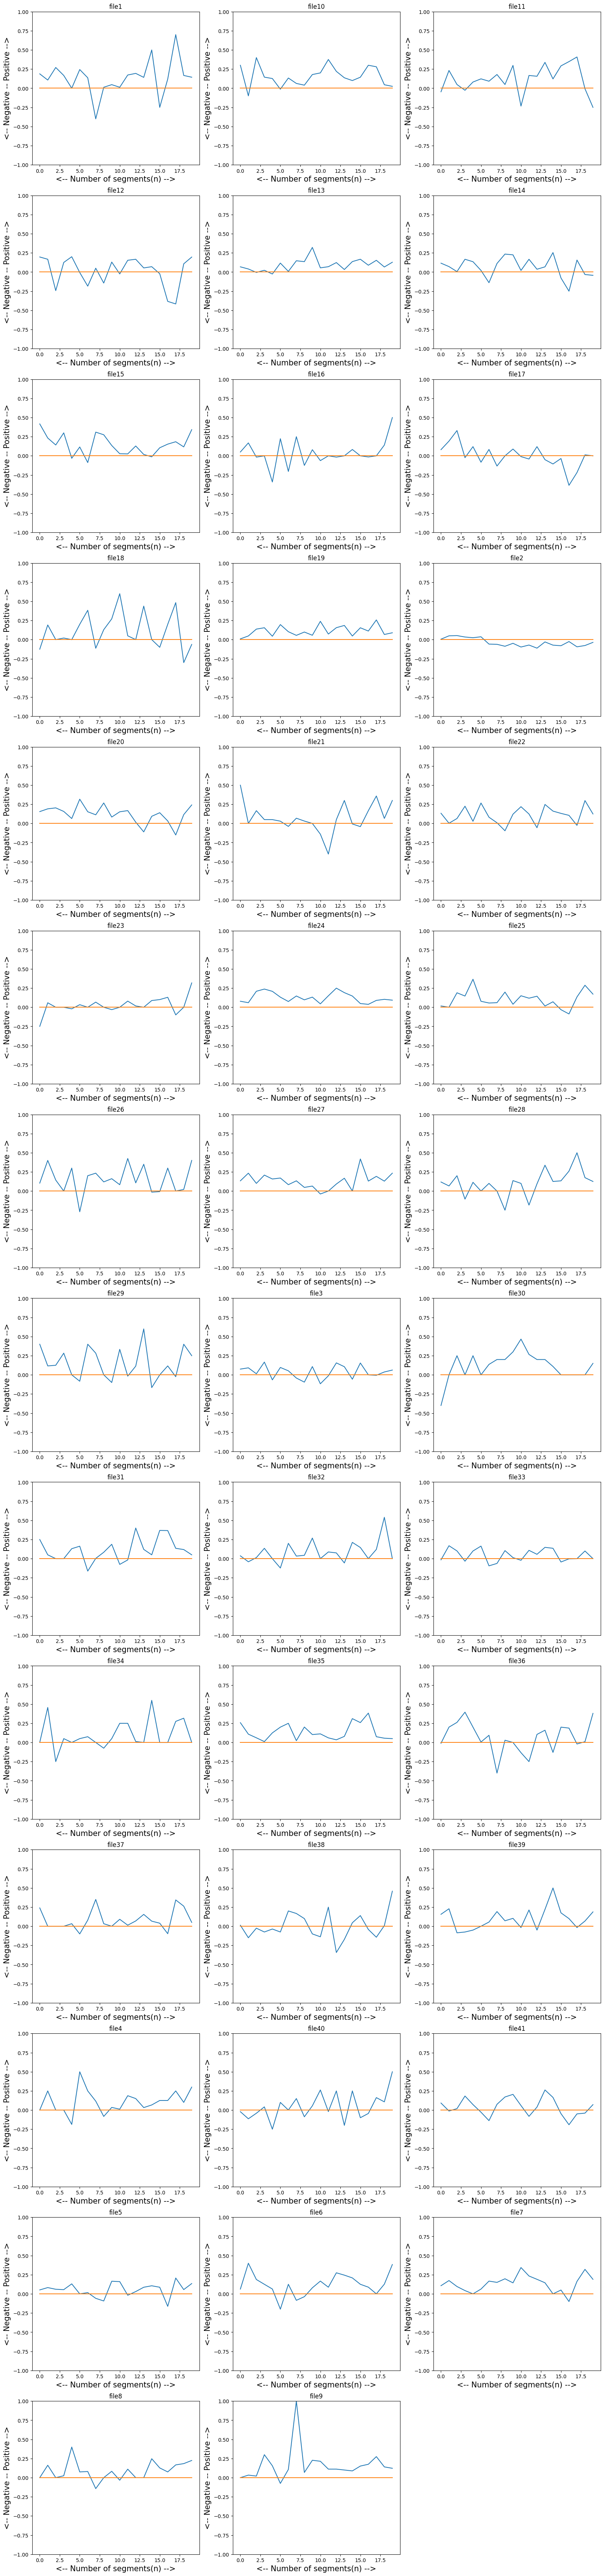

In [16]:
# Show the plot for all files
plt.rcParams['figure.figsize'] = [20, 90]

for index, file in enumerate(data.index):    
    plt.subplot(14, 3, index+1)
    plt.plot(polarity_transcript[index])
    plt.plot(np.arange(0,20), np.zeros(20))
    plt.title(data['name'][index])
    plt.xlabel('<-- Number of segments(n) -->', fontsize=15)
    plt.ylabel('<-- Negative -- Positive -->', fontsize=15)
    plt.ylim(ymin=-1, ymax=1)
    
plt.show()

### Assignments:
1. Classify all comedian accordig to Polarity and Subjectivity.
2. Modify the number of sections the comedy routine is split into and see how the charts over time change and again classify all comedian accordig to Polarity and Subjectivity.


## **Final Findings**
- **polarity** :  
        - Files 7, 9, 10, 13, 19, 23, 24, 27, 30, 35, 37 have positive sentiments  
        - Files 1, 3, 4, 5, 6, 11, 12, 14, 16, 17, 18, 20, 21, 22, 25, 26, 28, 29, 31, 32, 33, 34, 36, 38 ,39 ,40 and 41 have some text segments that have negative polarity.  
        - Files 2 have negative sentiment.
- **subjectivity** :  
        - Files 2, 3, 4, 10, 11, 12, 13, 14, 16, 17, 19, 21, 22, 23, 24, 25, 27, 28, 33, 37, 38 have more facts than opinion.  
        - Files 1, 9, 29, 34 have more opinionated text.   
        - Files 5, 6, 7, 8, 15, 18, 20, 26, 30, 31, 32, 35, 36, 39, 40 and 41 have some text segments with  subjectivity close to 1 and some with subjectivity close to 0.  

In [17]:
!pip install datasets

  Obtaining dependency information for datasets from https://files.pythonhosted.org/packages/9f/8a/3922b6d4a8fb40db454abd5d66b28215b047563564f044de693643d5d07f/datasets-2.19.1-py3-none-any.whl.metadata
  Obtaining dependency information for filelock from https://files.pythonhosted.org/packages/41/24/0b023b6537dfc9bae2c779353998e3e99ac7dfff4222fc6126650e93c3f3/filelock-3.14.0-py3-none-any.whl.metadata
  Obtaining dependency information for numpy>=1.17 from https://files.pythonhosted.org/packages/16/2e/86f24451c2d530c88daf997cb8d6ac622c1d40d19f5a031ed68a4b73a374/numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata
  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
  Obtaining dependency information for pyarrow>=12.0.0 from https://files.pythonhosted.org/packages/2c/e3/0879dfa4e1de2bcf06a22c9450af7755b4c9237588203b52df5927930b28/pyarrow-16.0.0-cp312-cp312-win_amd64.whl.metadata
  Using cached pyarrow-16.0.0-cp312-cp312-win_amd64.whl.metadata (3.1 kB)
  Obtaining dependency 


[notice] A new release of pip is available: 23.2.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip



   ---------------------------------------- 0.0/11.5 MB ? eta -:--:--
    --------------------------------------- 0.2/11.5 MB 7.6 MB/s eta 0:00:02
   -- ------------------------------------- 0.6/11.5 MB 6.5 MB/s eta 0:00:02
   -- ------------------------------------- 0.9/11.5 MB 6.8 MB/s eta 0:00:02
   --- ------------------------------------ 1.0/11.5 MB 5.4 MB/s eta 0:00:02
   ---- ----------------------------------- 1.3/11.5 MB 5.6 MB/s eta 0:00:02
   ----- ---------------------------------- 1.6/11.5 MB 5.7 MB/s eta 0:00:02
   ------- -------------------------------- 2.0/11.5 MB 6.1 MB/s eta 0:00:02
   -------- ------------------------------- 2.3/11.5 MB 6.2 MB/s eta 0:00:02
   --------- ------------------------------ 2.7/11.5 MB 6.3 MB/s eta 0:00:02
   ---------- ----------------------------- 3.0/11.5 MB 6.4 MB/s eta 0:00:02
   ----------- ---------------------------- 3.4/11.5 MB 6.7 MB/s eta 0:00:02
   ------------ --------------------------- 3.6/11.5 MB 6.8 MB/s eta 0:00:02
   --

In [ ]:
from datasets import load_dataset

dataset = load_dataset("Programming-Language/codeagent-python")